In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from fibheap import FibonacciHeap as FibHeap
from peel_by_motif import *
import random
import pandas as pd
from datetime import datetime
from compare_algs.greedy_algorithms import *
import graph_tool.all as gt

import dwave_networkx as dnx
import dimod
plt.rcParams.update({'font.size': 14})
sampler = dimod.SimulatedAnnealingSampler()

In [ ]:
result = []
syn_res= []
# repeat random graph construction five times.
for i in range(5):
    tresult = []
    tsyn_res = []
#     iterating p values
    for p in [0.1, 0.2, 0.4, 0.6]:
        q=0.1
#         Build random graph with two parts
        synG = nx.algorithms.bipartite.generators.random_graph(50, 50, p)
        for i in range(100, 200):
            synG.add_node(i)
            for j in range(100):
                if random.uniform(0,1)<0.01:
                    synG.add_edge(i,j)

        for i in range(100, 200):
            for j in range(i+1, 200):
                if random.uniform(0,1)<q:
                    synG.add_edge(i,j)

#         calculate max cut of original graph with randomized algorithm
        cut = dnx.maximum_cut(synG, sampler)
        cutsize = nx.cut_size(synG, cut)
        tsyn_res.append(cutsize/len(synG.edges))
        
#         listing all K3 and C4
        triangle_sub = nx.Graph([(1,2),(2,3),(1,3)])
        square_sub = nx.Graph([(1,2),(2,3),(3,0),(0,1)])

        ismags1 = nx.isomorphism.ISMAGS(synG, triangle_sub)
        ismags2 = nx.isomorphism.ISMAGS(synG, square_sub)
        it = ismags1.find_isomorphisms()
        cycls_3 = [list(dic.keys()) for dic in it]
        it = ismags2.find_isomorphisms()
        cycls_4 = [list(dic.keys()) for dic in it]
        
        node_d, fibheap = init_heap_and_dict([(cycls_4,1), (cycls_3,-1)])
        
#         peeling with K3 and C4 contrast
        results = peel_by_motif(node_d, fibheap, [(cycls_4,1), (cycls_3,-1)], 1, False)
        H = synG.subgraph(results[1])
        
#         calculate max cut of result subgraph with randomized algorithm
        cut = dnx.maximum_cut(H, sampler)
        cutsize = nx.cut_size(H, cut)
        print(cutsize/len(H.edges))
        tresult.append(cutsize/len(H.edges))
    result.append(tresult)
    syn_res.append(tsyn_res)

In [14]:
np.mean(result, axis=0)

array([0.72846515, 1.        , 1.        , 1.        ])

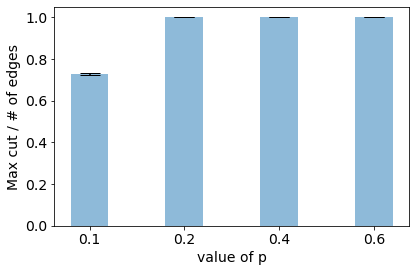

In [23]:

mean = np.mean(result, axis=0)
labels= [0.1, 0.2, 0.4, 0.6]
std = np.std(result, axis=0)
x_pos = np.arange((4))
fig, ax = plt.subplots()
ax.bar(x_pos, mean,
       yerr=std,
       align='center',
       alpha=0.5,
       ecolor='black', width=0.4,
       capsize=10)
ax.set_xlabel('value of p')
plt.ylabel('Max cut / # of edges')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
# ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
# ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('figs/synthetic/bar_plot_with_error_bars.png')
plt.show()

In [23]:
print(syn_res)
print(result)

[0.7863046044864227, 0.8389261744966443, 0.8911521323997453, 0.9128769746290091]
[0.7799511002444988, 1.0, 1.0, 1.0]
